<h1 style="background-color:#1aff1a;font-family:newtimeroman;font-size:550%;text-align:center;border-radius: 15px 50px;padding: 5px">How does Twitter know 
your personality ?</h1>


The objective of this project is to predict MBTI personality of twitter users by taking their recent 50 tweets posted on Twitter. The data considered has 8675 users data which has 2 columns, first their personality type, the second column is a string consisting their recent 50 tweers on twitter. The model to be trained is a Supervised learning model. We are training it with various models like XGBoost Classifier, CatBoost Classifier, SVM and other classifiers, to find appropriate model which gives better accuracy.

<h1 style="background-color:#bbf223;font-family:newtimeroman;font-size:350%;text-align:center;border-radius: 15px 50px;padding: 5px">Overview of MBTI personality types
</h1>


The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axis:

    Introversion (I) – Extroversion (E)
    Intuition (N) – Sensing (S)
    Thinking (T) – Feeling (F)
    Judging (J) – Perceiving (P)

So for example, someone who prefers introversion, intuition, thinking and perceiving would be labelled an INTP in the MBTI system, and there are lots of personality based components that would model or describe this person’s preferences or behaviour based on the label.

It is one of, if not the, the most popular personality test in the world. It is used in businesses, online, for fun, for research and lots more. A simple google search reveals all of the different ways the test has been used over time. It’s safe to say that this test is still very relevant in the world in terms of its use.

<h1 style="background-color:#99b3ff;font-family:newtimeroman;font-size:550%;text-align:center;border-radius: 15px 50px;padding: 5px">Libraries used</h1>


In [ ]:
import pandas as pd
import numpy as np
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud
from tqdm import tqdm
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

     |████████████████████████████████| 69.2MB 44kB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/Data set/mbti_1.csv"

'/content/drive/My Drive/Data set/mbti_1.csv'


In [ ]:
data = pd.read_csv('/content/drive/My Drive/Data set/mbti_1.csv')
data.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [ ]:
data.describe(include='O')

,type,posts
count,8675,8675
unique,16,8675
top,INFP,"'On my third year of college, and ready to giv..."
freq,1832,1


In [ ]:
data['type'].value_counts()

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    8675 non-null   object
 1   posts   8675 non-null   object
dtypes: object(2)
memory usage: 135.7+ KB


In [ ]:
data.posts[0]

"'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...

### From above it is quite evident that there are many links in the text data. That needed to be removed.

In [ ]:
# Stratify split to ensure equal distribution of data 

train_data,test_data=train_test_split(data,test_size=0.2,random_state=42,stratify=data.type)

### Function to clean the text data.

In [ ]:
def clear_text(data):
    data_length=[]
    lemmatizer=WordNetLemmatizer()
    cleaned_text=[]
    for sentence in tqdm(data.posts):
        sentence=sentence.lower()
        
#         removing links from text data
        sentence=re.sub('https?://[^\s<>"]+|www\.[^\s<>"]+',' ',sentence)
    
#         removing other symbols
        sentence=re.sub('[^0-9a-z]',' ',sentence)
    
        
        data_length.append(len(sentence.split()))
        cleaned_text.append(sentence)
    return cleaned_text,data_length

In [ ]:
train_data.posts,train_length=clear_text(train_data)

100%|██████████| 6940/6940 [00:03<00:00, 2273.56it/s]


In [ ]:
test_data.posts,test_length=clear_text(test_data)

100%|██████████| 1735/1735 [00:00<00:00, 2408.33it/s]


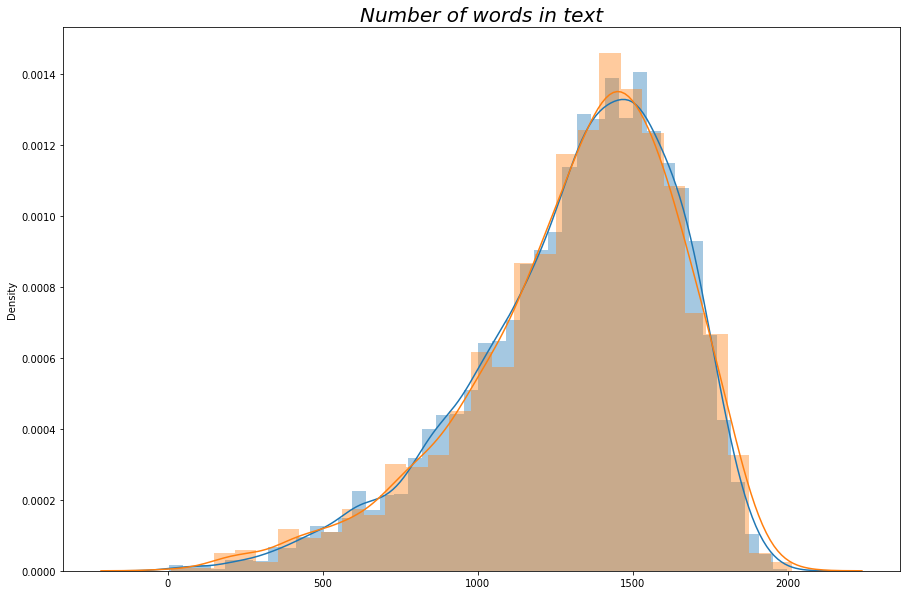

In [ ]:
plt.figure(figsize=(15,10))
sns.distplot(train_length,label='train data word length')
sns.distplot(test_length,label='test data word length')
plt.title('Number of words in text',fontdict={'size':20,'style':'italic'})
plt.show()

In [ ]:

px.pie(train_data,names='type',title='Personality type',hole=0.3)


In [ ]:
class Lemmatizer(object):
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
    def __call__(self, sentence):
        return [self.lemmatizer.lemmatize(word) for word in sentence.split() if len(word)>2]

<h1 style="background-color:#99b3ff;font-family:newtimeroman;font-size:550%;text-align:center;border-radius: 15px 50px;padding: 5px">Tokenizing words
</h1>

Tokenization is a way of separating a piece of text into smaller units called tokens. Here, tokens can be either words, characters, or subwords. Hence, tokenization can be broadly classified into 3 types – word, character, and subword (n-gram characters) tokenization.

In [ ]:
vectorizer=TfidfVectorizer( max_features=5000,stop_words='english',tokenizer=Lemmatizer())
import nltk
nltk.download('wordnet')
vectorizer.fit(train_data.posts)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=5000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<__main__.Lemmatizer object at 0x7f8d16760150>,
                use_idf=True, vocabulary=None)

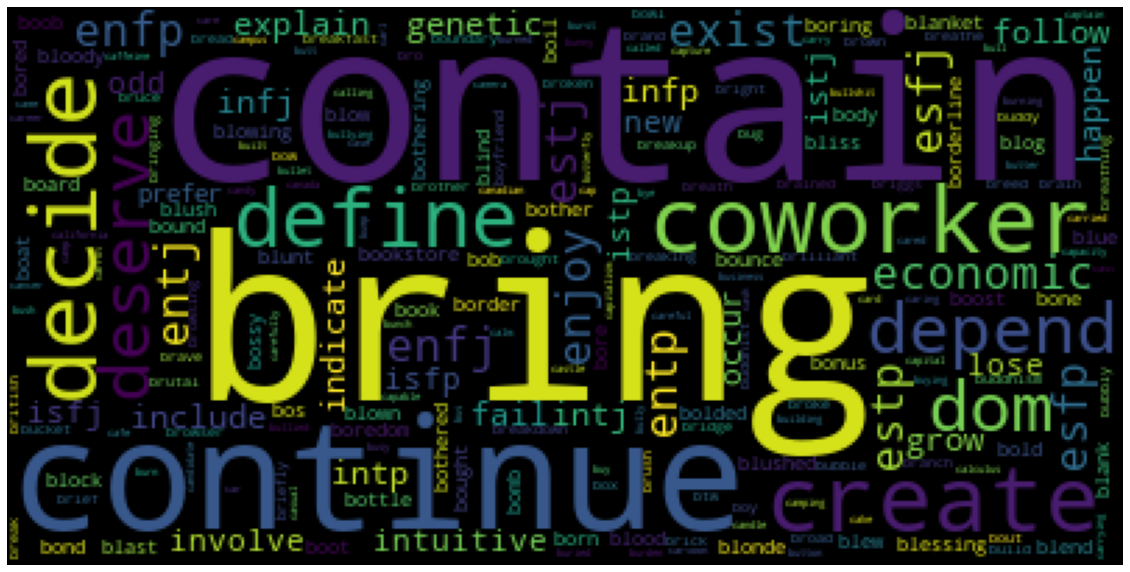

In [ ]:
feature_names=vectorizer.get_feature_names()
wc=WordCloud(max_words=400)
wc.generate(' '.join(word for word in feature_names[500:3500] ))
plt.figure(figsize=(20,15))
plt.axis('off')
plt.imshow(wc)

In [ ]:
train_post=vectorizer.transform(train_data.posts).toarray()
test_post=vectorizer.transform(test_data.posts).toarray()

In [ ]:
train_post.shape

(6940, 5000)

In [ ]:
target_encoder=LabelEncoder()
train_target=target_encoder.fit_transform(train_data.type)
test_target=target_encoder.fit_transform(test_data.type)

<h1 style="background-color:#99b3ff;font-family:newtimeroman;font-size:550%;text-align:center;border-radius: 15px 50px;padding: 5px">Model selection</h1>

In [ ]:
models_accuracy={}

<h4 style="background-color:#cc99ff;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;padding: 5px ">**Logistic Regression** is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.</h4>

In [ ]:
model_log=LogisticRegression(max_iter=3000,C=0.5,n_jobs=-1)
model_log.fit(train_post,train_target)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=3000,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print('train classification report \n ',classification_report(train_target,model_log.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.86      0.16      0.27       152
        ENFP       0.81      0.65      0.72       540
        ENTJ       0.93      0.29      0.44       185
        ENTP       0.82      0.66      0.73       548
        ESFJ       0.00      0.00      0.00        34
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       1.00      0.04      0.08        71
        INFJ       0.73      0.83      0.78      1176
        INFP       0.66      0.93      0.77      1465
        INTJ       0.73      0.80      0.77       873
        INTP       0.69      0.87      0.77      1043
        ISFJ       0.89      0.24      0.38       133
        ISFP       0.86      0.26      0.40       217
        ISTJ       0.86      0.27      0.41       164
        ISTP       0.86      0.52      0.65       270

    accuracy                           0.72      

In [ ]:
print('test classification report \n',classification_report(test_target,model_log.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

test classification report 
               precision    recall  f1-score   support

        ENFJ       1.00      0.08      0.15        38
        ENFP       0.76      0.53      0.62       135
        ENTJ       0.75      0.13      0.22        46
        ENTP       0.66      0.51      0.58       137
        ESFJ       0.00      0.00      0.00         8
        ESFP       0.00      0.00      0.00        10
        ESTJ       0.00      0.00      0.00         8
        ESTP       0.00      0.00      0.00        18
        INFJ       0.64      0.71      0.67       294
        INFP       0.57      0.88      0.69       367
        INTJ       0.61      0.65      0.63       218
        INTP       0.66      0.83      0.74       261
        ISFJ       0.67      0.12      0.21        33
        ISFP       0.85      0.20      0.33        54
        ISTJ       0.60      0.07      0.13        41
        ISTP       0.68      0.45      0.54        67

    accuracy                           0.63      17

In [ ]:
models_accuracy['logistic regression']=accuracy_score(test_target,model_log.predict(test_post))

<h4 style="background-color:#cc99ff;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;padding: 5px ">**Linear Support Vector classifier**: It is used for linearly separable data, which means if a dataset can be classified into two classes by using a single straight line, then such data is termed as linearly separable data, and classifier is used called as Linear SVM classifier.</h4>

In [ ]:
model_linear_svc=LinearSVC(C=0.1)
model_linear_svc.fit(train_post,train_target)

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
print('train classification report \n ',classification_report(train_target,model_linear_svc.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n',classification_report(test_target,model_linear_svc.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.89      0.45      0.60       152
        ENFP       0.85      0.76      0.80       540
        ENTJ       0.92      0.65      0.76       185
        ENTP       0.84      0.82      0.83       548
        ESFJ       0.83      0.29      0.43        34
        ESFP       1.00      0.11      0.19        38
        ESTJ       1.00      0.26      0.41        31
        ESTP       0.92      0.49      0.64        71
        INFJ       0.82      0.86      0.84      1176
        INFP       0.77      0.93      0.84      1465
        INTJ       0.83      0.85      0.84       873
        INTP       0.81      0.89      0.85      1043
        ISFJ       0.91      0.67      0.77       133
        ISFP       0.89      0.57      0.70       217
        ISTJ       0.87      0.66      0.75       164
        ISTP       0.89      0.83      0.86       270

    accuracy                           0.82      

In [ ]:
models_accuracy['Linear Support Vector classifier']=accuracy_score(test_target,model_linear_svc.predict(test_post))

<h4 style="background-color:#cc99ff;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;padding: 5px ">**Support Vector classifier**: It is a supervised machine learning model that uses classification algorithms for two-group classification problems. It takes the data points and outputs the hyperplane (which in two dimensions it’s simply a line) that best separates the tags.</h4>

In [ ]:
model_svc=SVC()
model_svc.fit(train_post,train_target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:

print('train classification report \n ',classification_report(train_target,model_svc.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_svc.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.97      0.84      0.90       152
        ENFP       0.96      0.95      0.95       540
        ENTJ       0.99      0.90      0.94       185
        ENTP       0.95      0.96      0.95       548
        ESFJ       1.00      0.56      0.72        34
        ESFP       1.00      0.37      0.54        38
        ESTJ       1.00      0.52      0.68        31
        ESTP       1.00      0.82      0.90        71
        INFJ       0.95      0.97      0.96      1176
        INFP       0.92      0.98      0.95      1465
        INTJ       0.96      0.96      0.96       873
        INTP       0.94      0.97      0.96      1043
        ISFJ       1.00      0.89      0.94       133
        ISFP       0.97      0.90      0.94       217
        ISTJ       0.94      0.92      0.93       164
        ISTP       0.97      0.94      0.95       270

    accuracy                           0.95      

In [ ]:
models_accuracy['Support Vector classifier']=accuracy_score(test_target,model_svc.predict(test_post))

<h4 style="background-color:#cc99ff;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;padding: 5px ">**Multinomial Naive Bayes**: It is suitable for classification with discrete features (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts. However, in practice, fractional counts such as tf-idf may also work.</h4>

In [ ]:
model_multinomial_nb=MultinomialNB()
model_multinomial_nb.fit(train_post,train_target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:

print('train classification report \n ',classification_report(train_target,model_multinomial_nb.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_multinomial_nb.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.00      0.00      0.00       152
        ENFP       0.90      0.02      0.03       540
        ENTJ       0.00      0.00      0.00       185
        ENTP       0.91      0.06      0.11       548
        ESFJ       0.00      0.00      0.00        34
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       0.00      0.00      0.00        71
        INFJ       0.52      0.62      0.56      1176
        INFP       0.35      0.94      0.52      1465
        INTJ       0.78      0.42      0.54       873
        INTP       0.58      0.64      0.61      1043
        ISFJ       0.00      0.00      0.00       133
        ISFP       0.00      0.00      0.00       217
        ISTJ       0.00      0.00      0.00       164
        ISTP       1.00      0.00      0.01       270

    accuracy                           0.46      

In [ ]:
models_accuracy['Multinomial Naive Bayes']=accuracy_score(test_target,model_multinomial_nb.predict(test_post))

<h4 style="background-color:#cc99ff;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;padding: 5px ">**Decision Tree Classifier**: It is a Supervised learning technique that can be used for both classification and Regression problems, but mostly it is preferred for solving Classification problems. It is a tree-structured classifier, where internal nodes represent the features of a dataset, branches represent the decision rules and each leaf node represents the outcome.</h4>

In [ ]:
model_tree=DecisionTreeClassifier(max_depth=14)
model_tree.fit(train_post,train_target)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:

print('train classification report \n ',classification_report(train_target,model_tree.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_tree.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.77      0.59      0.67       152
        ENFP       0.87      0.79      0.83       540
        ENTJ       0.87      0.67      0.76       185
        ENTP       0.96      0.76      0.85       548
        ESFJ       0.93      0.41      0.57        34
        ESFP       0.90      0.24      0.38        38
        ESTJ       0.86      0.39      0.53        31
        ESTP       0.86      0.42      0.57        71
        INFJ       0.81      0.85      0.83      1176
        INFP       0.62      0.94      0.75      1465
        INTJ       0.87      0.79      0.83       873
        INTP       0.89      0.81      0.85      1043
        ISFJ       0.98      0.47      0.64       133
        ISFP       0.97      0.63      0.76       217
        ISTJ       0.96      0.52      0.68       164
        ISTP       0.97      0.71      0.82       270

    accuracy                           0.79      

In [ ]:
models_accuracy['Decision Tree classifier']=accuracy_score(test_target,model_tree.predict(test_post))

<h4 style="background-color:#cc99ff;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;padding: 5px ">**Random Forest Classifier**: It is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. It provides higher accuracy through cross validation.</h4>

In [ ]:
model_forest=RandomForestClassifier(max_depth=10)
model_forest.fit(train_post,train_target)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:

print('train classification report \n ',classification_report(train_target,model_forest.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_forest.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       1.00      0.03      0.06       152
        ENFP       1.00      0.36      0.53       540
        ENTJ       1.00      0.10      0.18       185
        ENTP       0.99      0.56      0.72       548
        ESFJ       0.00      0.00      0.00        34
        ESFP       0.00      0.00      0.00        38
        ESTJ       0.00      0.00      0.00        31
        ESTP       0.00      0.00      0.00        71
        INFJ       0.79      0.82      0.81      1176
        INFP       0.45      0.99      0.62      1465
        INTJ       0.93      0.75      0.83       873
        INTP       0.79      0.88      0.83      1043
        ISFJ       1.00      0.08      0.14       133
        ISFP       1.00      0.08      0.15       217
        ISTJ       1.00      0.08      0.15       164
        ISTP       1.00      0.14      0.24       270

    accuracy                           0.66      

In [ ]:
models_accuracy['Random Forest Classifier']=accuracy_score(test_target,model_forest.predict(test_post))

<h4 style="background-color:#cc99ff;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;padding: 5px ">XGBoost Classifier : It is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a wrapper class to allow models to be treated like classifiers or regressors in the scikit-learn framework</h4>

In [ ]:
model_xgb=XGBClassifier(gpu_id=0,tree_method='gpu_hist',max_depth=5,n_estimators=50,learning_rate=0.1)
model_xgb.fit(train_post,train_target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=50, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, tree_method='gpu_hist', verbosity=1)

In [ ]:

print('train classification report \n ',classification_report(train_target,model_xgb.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_xgb.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.98      0.93      0.96       152
        ENFP       0.95      0.91      0.93       540
        ENTJ       0.99      0.92      0.96       185
        ENTP       0.95      0.91      0.93       548
        ESFJ       1.00      0.94      0.97        34
        ESFP       1.00      0.92      0.96        38
        ESTJ       1.00      0.84      0.91        31
        ESTP       1.00      0.96      0.98        71
        INFJ       0.92      0.90      0.91      1176
        INFP       0.89      0.95      0.92      1465
        INTJ       0.93      0.92      0.92       873
        INTP       0.90      0.92      0.91      1043
        ISFJ       1.00      0.95      0.98       133
        ISFP       0.99      0.92      0.95       217
        ISTJ       0.99      0.93      0.96       164
        ISTP       0.98      0.96      0.97       270

    accuracy                           0.93      

In [ ]:
models_accuracy['XGBoost Classifier']=accuracy_score(test_target,model_xgb.predict(test_post))

<h4 style="background-color:#cc99ff;font-family:newtimeroman;font-size:300%;text-align:center;border-radius: 15px 50px;padding: 5px ">CatBoost Classifier</h4>

**CatBoost Classifier**: CatBoost is an algorithm for gradient boosting on decision trees. It divides a given dataset into random permutations and applies ordered boosting on those random permutations. CatBoost converts categorical values into numbers using various statistics on combinations of categorical features and combinations of categorical and numerical features.


In [ ]:
model_cat=CatBoostClassifier(loss_function='MultiClass',eval_metric='MultiClass',task_type='GPU',verbose=False)
model_cat.fit(train_post,train_target)

In [ ]:

print('train classification report \n ',classification_report(train_target,model_cat.predict(train_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))
print('test classification report \n ',classification_report(test_target,model_cat.predict(test_post),target_names=target_encoder.inverse_transform([i for i in range(16)])))

train classification report 
                precision    recall  f1-score   support

        ENFJ       0.83      0.55      0.66       152
        ENFP       0.81      0.74      0.78       540
        ENTJ       0.87      0.63      0.73       185
        ENTP       0.78      0.78      0.78       548
        ESFJ       0.93      0.41      0.57        34
        ESFP       1.00      0.21      0.35        38
        ESTJ       1.00      0.32      0.49        31
        ESTP       0.95      0.55      0.70        71
        INFJ       0.79      0.83      0.81      1176
        INFP       0.77      0.88      0.82      1465
        INTJ       0.80      0.81      0.80       873
        INTP       0.75      0.86      0.80      1043
        ISFJ       0.87      0.61      0.72       133
        ISFP       0.83      0.64      0.72       217
        ISTJ       0.87      0.67      0.76       164
        ISTP       0.86      0.75      0.80       270

    accuracy                           0.79      

In [ ]:
models_accuracy['CatBoost Classifier']=accuracy_score(test_target,model_cat.pr 0 8  edict(test_post))

In [ ]:

models_accuracy

{'CatBoost Classifier': 0.6731988472622479,
 'Decision Tree classifier': 0.5135446685878963,
 'Linear Support Vector classifier': 0.661671469740634,
 'Multinomial Naive Bayes': 0.37809798270893374,
 'Random Forest Classifier': 0.4426512968299712,
 'Support Vector classifier': 0.6489913544668587,
 'XGBoost Classifier': 0.6657060518731989,
 'logistic regression': 0.6282420749279539}

In [ ]:
models_accuracy.keys()

dict_keys(['logistic regression', 'Linear Support Vector classifier', 'Support Vector classifier', 'Multinomial Naive Bayes', 'Decision Tree classifier', 'Random Forest Classifier', 'XGBoost Classifier', 'CatBoost Classifier'])

In [ ]:
accuarcy=pd.DataFrame(models_accuracy.items(),columns=['Models','Test accuracy'])

Accuracy of models from high to low


In [ ]:
accuarcy.sort_values(by='Test accuracy',ascending=False,ignore_index=True).style.background_gradient(cmap='Blues')

,Models,Test accuracy
0,CatBoost Classifier,0.673199
1,XGBoost Classifier,0.665706
2,Linear Support Vector classifier,0.661671
3,Support Vector classifier,0.648991
4,logistic regression,0.628242
5,Decision Tree classifier,0.513545
6,Random Forest Classifier,0.442651
7,Multinomial Naive Bayes,0.378098


Catboost model seems to perform well in predicting personalities. CatBoost uses an efficient method of encoding, which is similar to mean encoding but with an additional mechanism aimed at reducing overfitting. The next better performing are XGBoost Classifier, Linear support vector classifier. 


Hence Boosting Classifier models are performing better than other algorithms in text based classification problems 
